# Introduction
<hr style = "border:2px solid black" ></hr>

<div class="alert alert-warning">
<font color=black>

**What?** Calculating derivatives

</font>
</div>

# Import modules
<hr style = "border:2px solid black" ></hr>

In [1]:
import matplotlib.pyplot as plt
import torch

# Differentiation in Autograd
<hr style = "border:2px solid black" ></hr>

<div class="alert alert-info">
<font color=black>

- **Autograd** is an auto differentiation module in PyTorch and is used to calculate the derivatives and optimize the parameters in neural networks. 
- Let’s use a simple tensor and set the `requires_grad` parameter to true. This allows us to perform automatic differentiation and lets PyTorch evaluate the derivatives using the given value which, in this case, is 3.0.  

</font>
</div>

In [8]:
x = torch.tensor(3.0, requires_grad = True)
x

tensor(3., requires_grad=True)

In [9]:
x.shape

torch.Size([])

<div class="alert alert-info">
<font color=black>

- We’ll use a simple equation `y=3x^2` as an example and take the derivative with respect to variable x. 
- We’ll apply a method `.backward()` on the variable y that forms **acyclic graph** storing the computation history, and evaluate the result with `.grad()` for the given value.  

</font>
</div>

In [10]:
y = 3 * x ** 2
print("Result of the equation is: ", y)
y.backward()
print("Dervative dy/dx evaluate at x = 3 is: ", x.grad)

Result of the equation is:  tensor(27., grad_fn=<MulBackward0>)
Dervative dy/dx evaluate at x = 3 is:  tensor(18.)


# Computational Graph
<hr style = "border:2px solid black" ></hr>

<div class="alert alert-info">
<font color=black>

- PyTorch generates derivatives by building a backwards graph behind the scenes, while tensors and backwards functions are the graph’s nodes. 
- In a graph, PyTorch computes the derivative of a tensor depending on whether it is a **leaf** or not.
- PyTorch will not evaluate a tensor’s derivative if its leaf attribute is set to `True`. 


- Three attributes can be seen here:
    - `data`    attribute stores the tensor’s data
    - `grad_fn` attribute tells about the node in the graph
    - `.grad`   attribute holds the result of the derivative.

</font>
</div>

In [11]:
print('data attribute of the tensor:',x.data)
print('grad attribute of the tensor::',x.grad)
print('grad_fn attribute of the tensor::',x.grad_fn)
print("is_leaf attribute of the tensor::",x.is_leaf)
print("requires_grad attribute of the tensor::",x.requires_grad)

data attribute of the tensor: tensor(3.)
grad attribute of the tensor:: tensor(18.)
grad_fn attribute of the tensor:: None
is_leaf attribute of the tensor:: True
requires_grad attribute of the tensor:: True


In [12]:
print('data attribute of the tensor:',y.data)
print('grad attribute of the tensor:',y.grad)
print('grad_fn attribute of the tensor:',y.grad_fn)
print("is_leaf attribute of the tensor:",y.is_leaf)
print("requires_grad attribute of the tensor:",y.requires_grad)

data attribute of the tensor: tensor(27.)
grad attribute of the tensor: None
grad_fn attribute of the tensor: <MulBackward0 object at 0x7f99fff9d220>
is_leaf attribute of the tensor: False
requires_grad attribute of the tensor: True


/opt/anaconda3/envs/trainingAI/lib/python3.9/site-packages/torch/_tensor.py:1013: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at  aten/src/ATen/core/TensorBody.h:417.)
  return self._grad


# Example #1
<hr style = "border:2px solid black" ></hr>

<div class="alert alert-info">
<font color=black>

- Patial derivatives of one function wrt many variables.

</font>
</div>

In [14]:
u = torch.tensor(3., requires_grad=True)
v = torch.tensor(4., requires_grad=True)

f = u**3 + v**2 + 4*u*v

print(u)
print(v)
print(f)

f.backward()
print("Partial derivative with respect to u: ", u.grad)
print("Partial derivative with respect to u: ", v.grad)

tensor(3., requires_grad=True)
tensor(4., requires_grad=True)
tensor(91., grad_fn=<AddBackward0>)
Partial derivative with respect to u:  tensor(43.)
Partial derivative with respect to u:  tensor(20.)


# Example #2
<hr style = "border:2px solid black" ></hr>

<div class="alert alert-info">
<font color=black>

- What if we have a function with multiple values and we need to calculate the derivative with respect to its multiple values? 
- For this, we’ll make use of the sum attribute to (1) produce a scalar-valued function, and then (2) take the derivative.

</font>
</div>

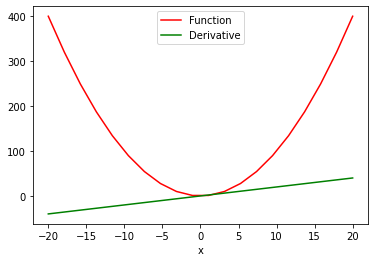

In [15]:
# compute the derivative of the function with multiple values
x = torch.linspace(-20, 20, 20, requires_grad = True)
Y = x ** 2
y = torch.sum(Y)
y.backward()

# ploting the function and derivative
function_line, = plt.plot(x.detach().numpy(), Y.detach().numpy(), label = 'Function')
function_line.set_color("red")
derivative_line, = plt.plot(x.detach().numpy(), x.grad.detach().numpy(), label = 'Derivative')
derivative_line.set_color("green")
plt.xlabel('x')
plt.legend()
plt.show()

# References
<hr style = "border:2px solid black" ></hr>

<div class="alert alert-warning">
<font color=black>

- https://machinelearningmastery.com/calculating-derivatives-in-pytorch/

</font>
</div>